<a href="https://colab.research.google.com/github/aamorgan/Colaboratory/blob/main/01_neural_network_regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__) # check the version (should be 2.x+)

2.9.2


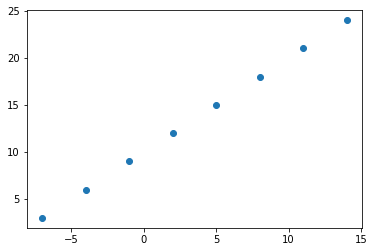

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [4]:
y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

###Input and Output shapes

In [5]:
# Example input and output shapes of a regresson model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
X = tf.constant(X)
y = tf.constant(y)
# Take a single example of X
input_shape = X[0].shape 

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [7]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=1000)

Epoch 1/1000
1/1 [==============================] - 1s 619ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 11.5003 - mae: 11.5003
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 11.4958 - mae: 11.4958
Epoch 4/1000
1/1 [==============================] - 0s 12ms/step - loss: 11.4913 - mae: 11.4913
Epoch 5/1000
1/1 [==============================] - 0s 10ms/step - loss: 11.4868 - mae: 11.4868
Epoch 6/1000
1/1 [==============================] - 0s 31ms/step - loss: 11.4823 - mae: 11.4823
Epoch 7/1000
1/1 [==============================] - 0s 10ms/step - loss: 11.4778 - mae: 11.4778
Epoch 8/1000
1/1 [==============================] - 0s 12ms/step - loss: 11.4733 - mae: 11.4733
Epoch 9/1000
1/1 [==============================] - 0s 16ms/step - loss: 11.4688 - mae: 11.4688
Epoch 10/1000
1/1 [==============================] - 0s 7ms/step - loss: 11.4643 - mae: 11.4643
Epoch 11/1000
1/1 [=====================

In [8]:
# Make a prediction with the model
model.predict([17.0])


1/1 [==============================] - 0s 258ms/step


array([[27.691368]], dtype=float32)

In [9]:
# Make a bigger dataset
Xl = np.arange(-100, 100, 4)

# Make labels for the dataset (adhering to the same pattern as before)
yl = np.arange(-90, 110, 4)

# Split data into train and test sets
X_train = Xl[:40] # first 40 examples (80% of data)
y_train = yl[:40]

X_test = Xl[40:] # last 10 examples (20% of data)
y_test = yl[40:]

Xl,yl,len(X_train), len(X_test)


(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 40,
 10)

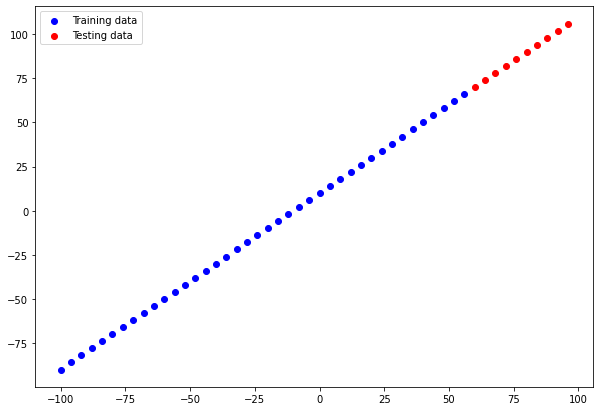

In [10]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='r', label='Testing data')
# Show the legend
plt.legend();
     

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), # SGD is short for stochastic gradient descent
              metrics=["mae"])
  
# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

# Make a prediction with the model
model.predict([17.0])

Epoch 1/100
1/1 [==============================] - 1s 594ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 26ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 14ms/

array([[27.216784]], dtype=float32)

In [12]:
# Make a bigger dataset
Xl = np.arange(-100, 100, 4)

# Make labels for the dataset (adhering to the same pattern as before)
yl = np.arange(-90, 110, 4)

# Split data into train and test sets
X_train = Xl[:40] # first 40 examples (80% of data)
y_train = yl[:40]

X_test = Xl[40:] # last 10 examples (20% of data)
y_test = yl[40:]

Xl,yl,len(X_train), len(X_test)

(array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96]),
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 40,
 10)

#Split data into training/test set
One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set).

Each set serves a specific purpose:

* Training set - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* Validation set - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* Test set - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).
For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays.

> 🔑 Note: When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

### Visualizing the data

Now we've split it let's visualize

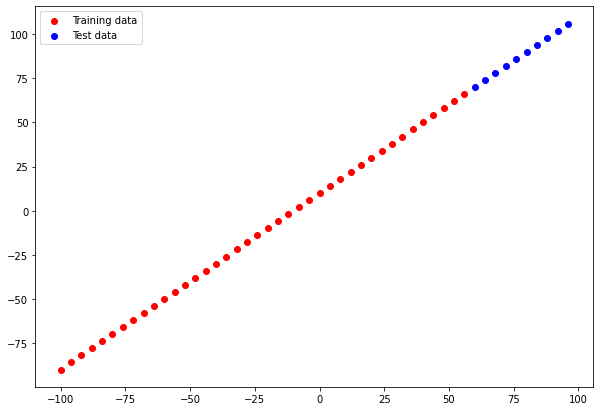

In [42]:
plt.figure(figsize=(10, 7))
#Plot training data in red
plt.scatter(X_train, y_train, c='r', label='Training data')
# Plot test data in blue
plt.scatter(X_test, y_test, c='b', label='Test data')
plt.legend()

In [43]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
#model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

#Visualize the model

In [15]:
model.summary()

ValueError: ignored

In [44]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train, epochs=1000, verbose= 0)

In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


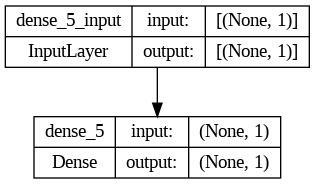

In [30]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Visualizing the models predictions

In [47]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 [==============================] - 0s 65ms/step


array([[ 73.74988 ],
       [ 78.11511 ],
       [ 82.48035 ],
       [ 86.8456  ],
       [ 91.21083 ],
       [ 95.576065],
       [ 99.9413  ],
       [104.30653 ],
       [108.67177 ],
       [113.03702 ]], dtype=float32)

In [37]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

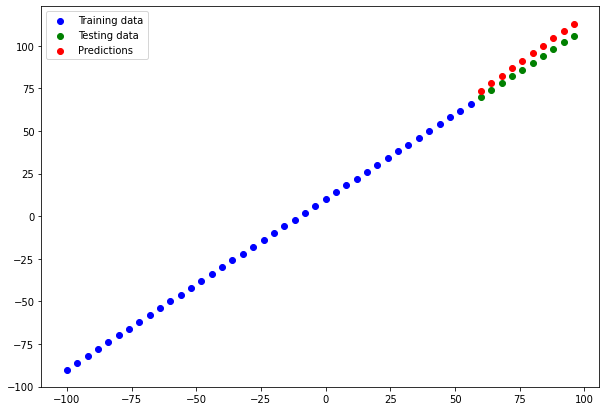

In [48]:
plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=y_preds)

In [49]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 91ms/step - loss: 5.3934 - mae: 5.3934


[5.393445014953613, 5.393445014953613]

In [61]:
mae = tf.keras.metrics.mae(y_true = y_test, y_pred = tf.squeeze(y_preds))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=5.393445>

In [58]:
tf.reshape(tf.constant(y_preds), shape=[10])

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 73.74988 ,  78.11511 ,  82.48035 ,  86.8456  ,  91.21083 ,
        95.576065,  99.9413  , 104.30653 , 108.67177 , 113.03702 ],
      dtype=float32)>

In [64]:
mse = tf.keras.metrics.MSE(y_true = y_test, y_pred = y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=30.189783>

In [65]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred.squeeze())
  
def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred.squeeze())

In [66]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0) # set verbose to 0 for less output

1/1 [==============================] - 0s 44ms/step


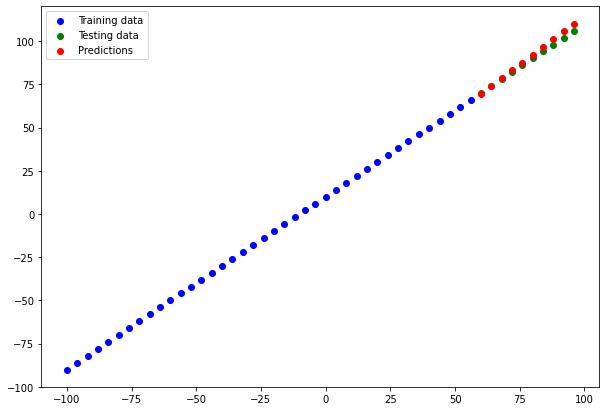

In [67]:

# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [68]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(1.9097328, 5.45877)

1/1 [==============================] - 0s 406ms/step


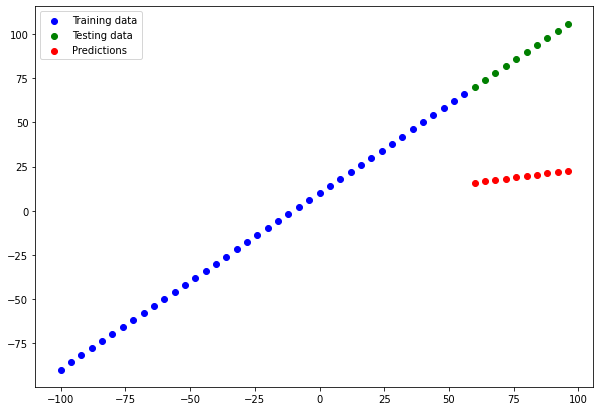

In [69]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0) # set verbose to 0 for less output


# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [70]:

# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(68.68784, 4804.469)

1/1 [==============================] - 0s 44ms/step


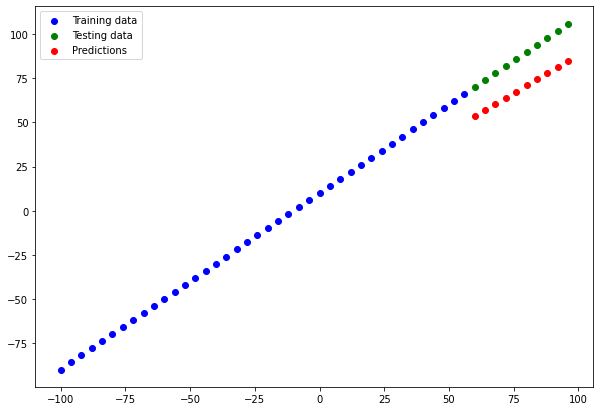

In [71]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)



# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [72]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(18.745327, 353.57336)

In [73]:

model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]
     

In [74]:

import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,1.909733,5.458770
2,model_3,68.687843,68.687843


In [75]:

# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [77]:

# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


In [78]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1)                 2         
                                                                 
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
